In [45]:
import numpy as np
import matplotlib.pyplot as plt
from routines.surv_data_generator import surv_models
from routines.cox_routines import cox_model
import pandas as pd

In [46]:
df = pd.read_csv('chop.csv')


In [47]:
df.head()

,pid,event,time,num_1552325_at,num_1552365_at,num_1552367_a_at,num_1552368_at,num_1552372_at,num_1552373_s_at,num_1552379_at,...,num_37892_at,num_AFFX-LysX-5_at,num_AFFX-r2-Bs-dap-3_at,num_AFFX-r2-Bs-dap-5_at,num_AFFX-r2-Bs-dap-M_at,num_AFFX-r2-Bs-lys-5_at,num_AFFX-r2-Bs-lys-M_at,num_AFFX-r2-Bs-phe-5_at,num_AFFX-r2-Bs-phe-M_at,num_AFFX-TrpnX-3_at
0,0,1,2.68,4.982,2.322,3.202,2.233,0.585,2.585,5.794,...,3.406,2.379,5.062,2.036,1.070,2.322,5.714,0.485,1.632,0.138
1,1,1,0.82,0.926,4.329,2.744,5.040,0.379,5.361,1.678,...,6.855,4.678,3.807,0.678,1.807,4.807,4.350,5.070,2.263,2.138
2,2,1,2.54,4.863,1.848,3.379,5.805,3.755,5.579,2.536,...,3.536,3.916,3.154,4.561,1.585,4.771,2.104,4.548,5.018,2.485
3,3,0,9.67,3.776,2.104,1.202,5.315,1.202,5.256,2.722,...,1.632,3.838,2.700,1.766,4.217,5.758,1.632,1.263,5.567,3.446
4,4,0,4.83,5.285,1.722,4.000,7.170,1.322,3.838,4.336,...,9.239,2.807,3.202,1.807,4.833,2.170,4.945,1.263,1.138,2.104


In [48]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df, test_size = 0.1, random_state=16)

In [49]:
df_train.head()

,pid,event,time,num_1552325_at,num_1552365_at,num_1552367_a_at,num_1552368_at,num_1552372_at,num_1552373_s_at,num_1552379_at,...,num_37892_at,num_AFFX-LysX-5_at,num_AFFX-r2-Bs-dap-3_at,num_AFFX-r2-Bs-dap-5_at,num_AFFX-r2-Bs-dap-M_at,num_AFFX-r2-Bs-lys-5_at,num_AFFX-r2-Bs-lys-M_at,num_AFFX-r2-Bs-phe-5_at,num_AFFX-r2-Bs-phe-M_at,num_AFFX-TrpnX-3_at
70,70,0,5.65,4.343,4.902,3.807,4.329,3.498,3.689,4.863,...,3.597,3.878,4.542,2.536,0.678,1.585,5.186,5.329,3.138,4.322
132,132,1,0.16,4.315,1.632,2.655,2.561,4.722,2.233,0.926,...,3.632,4.706,1.202,2.070,0.000,0.766,2.926,1.263,3.406,4.472
214,214,1,1.49,5.259,6.951,6.476,3.365,4.524,0.263,4.995,...,7.142,1.585,7.040,5.221,5.517,5.040,5.092,6.379,5.542,2.963
326,326,0,1.37,3.878,1.263,1.322,6.915,0.138,6.265,3.548,...,1.963,6.406,10.578,9.060,9.670,6.020,6.618,7.317,6.985,5.075
245,245,0,1.04,4.807,6.068,3.973,10.914,4.202,5.624,4.711,...,4.209,8.354,13.312,11.357,12.402,9.048,9.743,9.713,9.445,5.420


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_names = df_train.columns
feat_names = [x for x in col_names if (x != 'event' and x!= 'time' and x!= 'pid')]
df_train[feat_names] = scaler.fit_transform(df_train[feat_names])
t = df_train['time'].values
c = df_train['event'].values
x = df_train[feat_names].values


print(c)
print(t)
df_val[feat_names] = scaler.transform(df_val[feat_names])
x_val = df_val[feat_names].values
t_val = df_val['time'].values
c_val = df_val['event'].values

[0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1
 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1
 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1
 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1
 0 1]
[5.65e+00 1.60e-01 1.49e+00 1.37e+00 1.04e+00 5.23e+00 5.00e-02 2.17e+00
 7.24e+00 3.50e+00 3.00e-01 6.10e-01 4.47e+00 1.08e+00 5.10e+00 2.16e+00
 5.51e+00 1.06e+01 1.59e+00 1.20e-01 4.11e+00 3.80e-01 2.87e+00 2.98e+00
 8.60e-01 3.07e+00 3.10e-

In [51]:
p = len(x[0, :])
n = len(t)

x = x 
print(p, n)

3833 372


In [52]:
rhos = np.exp(np.linspace(np.log(2), np.log(0.5), 1000)) * np.sqrt(p)
model = cox_model(p, rhos, 1.0)

In [53]:
# model.fit(t, c, x, 'amp', eps = 0.9, tolerance = 1.0e-6, verb_flag = True)
# betas_amp = model.betas
# rs_loo_hc_amp = model.rs_loo_hc
# val_err_amp = model.compute_Harrel_c_test(t_val, c_val, x_val)
model.fit(t, c, x, 'cd', verb_flag= True)
betas_cd = model.betas
rs_loo_hc_cd = model.rs_loo_hc
val_err_cd = model.compute_Harrel_c_test(t_val, c_val, x_val)

CD alpha = 123.82245353731285, time elapsed = 0.004452848434448242, its =1
CD alpha = 123.65074650693423, time elapsed = 0.0031217137972513833, its =1
CD alpha = 123.47927758607, time elapsed = 0.0029683828353881834, its =1
CD alpha = 123.30804644452901, time elapsed = 0.002927716573079427, its =1
CD alpha = 123.13705275257799, time elapsed = 0.0029201785723368327, its =1
CD alpha = 122.96629618094093, time elapsed = 0.0029773831367492674, its =1
CD alpha = 122.79577640079845, time elapsed = 0.0029024680455525718, its =1
CD alpha = 122.62549308378708, time elapsed = 0.002951316038767497, its =1
CD alpha = 122.4554459019988, time elapsed = 0.0029186010360717773, its =1
CD alpha = 122.28563452798024, time elapsed = 0.0028849999109903973, its =1
CD alpha = 122.1160586347321, time elapsed = 0.002910355726877848, its =1
CD alpha = 121.94671789570862, time elapsed = 0.003182816505432129, its =1
CD alpha = 121.77761198481676, time elapsed = 0.0029846350351969402, its =1
CD alpha = 121.6087405

SystemError: CPUDispatcher(<function cd_update at 0x118f927a0>) returned a result with an exception set

Text(0.5, 0, '$\\rho$')

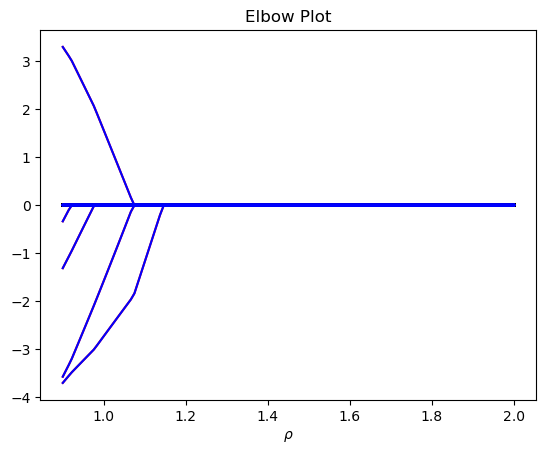

In [ ]:
plt.figure()
plt.title('Elbow Plot')
plt.plot(rhos, betas_amp, 'r-')
plt.plot(rhos, betas_cd, 'b-')
plt.xlabel(r'$\rho$')

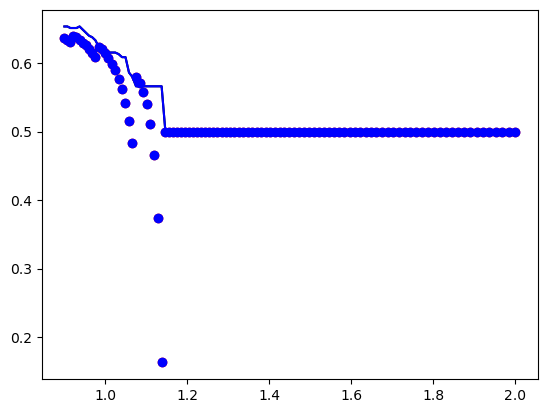

In [ ]:
plt.figure()
plt.plot(rhos, rs_loo_hc_amp, 'ro')
plt.plot(rhos, val_err_amp, 'k-')
plt.plot(rhos, rs_loo_hc_cd, 'bo')
plt.plot(rhos, val_err_cd, 'b-')


In [ ]:
print(c_val)
print(t_val)


[0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 1 0 1]
[8.89e+00 1.01e+00 2.31e+00 2.12e+00 5.38e+00 2.12e+00 3.35e+00 3.30e-01
 5.10e-01 4.03e+00 3.30e+00 9.99e+00 1.88e+00 1.55e+00 9.00e-02 1.21e+00
 1.65e+00 1.70e-01 1.63e+00 4.34e+00 3.10e-01 2.42e+00 4.09e+00 6.70e-01
 6.87e+00 1.60e+00 1.41e+00 5.06e+00 2.51e+00 1.67e+00 6.80e-01 4.36e+00
 3.75e+00 1.31e+00 2.68e+00 8.10e-01 1.00e-02 1.27e+00 1.11e+01 1.03e+00
 4.04e+00 3.70e-01]


In [ ]:
den = 0 
c_ind = 0
lp = x_val @ betas_amp[0,:]
gamma_n = np.sqrt(np.mean(lp**2))
for i in range(len(t_val)):
    a = c_val * np.array(t_val < t_val[i], int)
    den = den + np.sum(a)
    c_ind = c_ind + np.sum(a * np.array(lp > lp[i], int))
    # print(sum(a), np.sum(a * np.array(lp > lp[i], int)))
hc = c_ind / den
print(hc)
print(den)
print(c_ind)




0.0
447
0


NameError: name 'fmt' is not defined

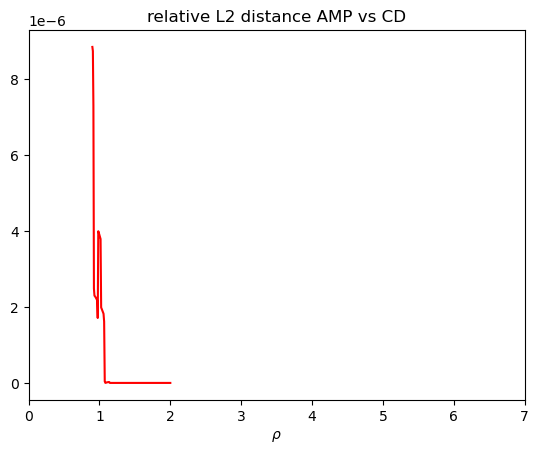

In [ ]:
mse = np.sqrt(np.mean((betas_cd - betas_amp)**2, axis = 1))#/ np.sqrt(np.sum((betas_cd)**2, axis = 1))


plt.figure()
plt.title('relative L2 distance AMP vs CD')
plt.plot(rhos, mse, 'r-')
plt.xlabel(r'$\rho$')
plt.xlim(left = 0.0, right = 7.0)
plt.savefig('figures/error_AMP_CD' + fmt + '.jpg')
